## Partial-dependence Profiles vs Accumulated-local Profiles

### Cách tính toán Partial Dependence Profiles (PDP)

Partial Dependence Profiles (PDP) được tính dựa trên việc ước lượng giá trị trung bình của đầu ra dự đoán khi thay đổi giá trị của một hoặc một nhóm đặc trưng cụ thể, trong khi giữ các đặc trưng còn lại cố định. Phương pháp này giúp hiểu ảnh hưởng trung bình của một đặc trưng đến dự đoán của mô hình.

---

### Công thức tính toán PDP

Giả sử bạn có:

   - **$f(X)$**: Hàm dự đoán của mô hình.
   - **$S$**: Nhóm các đặc trưng được phân tích (có thể là một hoặc nhiều đặc trưng).
   - **$C$**: Nhóm các đặc trưng còn lại không thuộc $S$, tức $C = X \setminus S$.
   - **$X_S$**: Các giá trị có thể của $S$.
   - **$X_C$**: Các giá trị của các đặc trưng còn lại.

Partial Dependence của $S$ được tính bằng cách trung bình hóa $f(X)$ theo $X_C$:
$$
PD_S(x_S) = \frac{1}{N} \sum_{i=1}^N f(x_S, x_{C_i})
$$
Trong đó:

   - $x_S$: Giá trị cụ thể của các đặc trưng $S$ mà bạn muốn phân tích.
   - $x_{C_i}$: Các giá trị thực tế của các đặc trưng còn lại $C$ từ dữ liệu huấn luyện.
   - $N$: Số lượng mẫu trong tập dữ liệu huấn luyện.

---

### Các bước tính toán PDP

1. **Xác định đặc trưng cần phân tích ($S$)**:
   - Chọn một hoặc nhiều đặc trưng mà bạn muốn kiểm tra tác động của nó lên đầu ra của mô hình.

2. **Giữ các đặc trưng còn lại cố định ($X_C$)**:
   - Duy trì giá trị thực tế của các đặc trưng không thuộc $S$ từ dữ liệu huấn luyện.

3. **Thay đổi giá trị của đặc trưng phân tích ($x_S$)**:
   - Chọn một khoảng giá trị hoặc các giá trị mẫu cho $x_S$.

4. **Tính giá trị dự đoán ($f(x_S, x_{C_i})$)**:
   - Tính toán dự đoán của mô hình cho từng giá trị $x_S$ trong khi giữ các $x_{C_i}$ cố định.

5. **Lấy trung bình**:
   - Lấy trung bình các giá trị dự đoán trên toàn bộ tập dữ liệu huấn luyện để thu được Partial Dependence.

---

### Ví dụ minh họa (bằng Python)

Giả sử bạn có một mô hình và dữ liệu như sau:

```python
import numpy as np

# Hàm dự đoán của mô hình (giả định)
def f(x_s, x_c):
    return x_s * 2 + x_c * 0.5  # Ví dụ mô hình tuyến tính

# Dữ liệu mẫu
x_c_values = np.array([1, 2, 3, 4, 5])  # Các giá trị thực tế của X_C
x_s_values = np.linspace(0, 10, 100)    # Giá trị thay đổi của X_S

# Tính toán Partial Dependence
pd_values = []
for x_s in x_s_values:
    predictions = [f(x_s, x_c) for x_c in x_c_values]
    pd_values.append(np.mean(predictions))

# Kết quả
print(pd_values)
```

---

### Đồ thị trực quan hóa PDP
Sau khi tính toán $PD_S(x_S)$, bạn có thể vẽ đồ thị để hiểu mối quan hệ giữa $x_S$ và giá trị trung bình đầu ra dự đoán.

```python
import matplotlib.pyplot as plt

plt.plot(x_s_values, pd_values, label="Partial Dependence")
plt.xlabel("Feature Value (X_S)")
plt.ylabel("Average Prediction")
plt.title("Partial Dependence Plot")
plt.legend()
plt.show()
```

---

### Một số lưu ý
- PDP giả định rằng các đặc trưng không liên quan (independent), vì vậy nếu các đặc trưng có tương quan cao, kết quả PDP có thể không chính xác.
- Khi sử dụng PDP cho nhóm đặc trưng, việc tính toán sẽ phức tạp hơn do cần đánh giá trên không gian đa chiều.

PDP là công cụ mạnh mẽ để giải thích mô hình, nhưng khi gặp dữ liệu phức tạp (đặc biệt khi có sự phụ thuộc giữa các đặc trưng), bạn có thể cân nhắc sử dụng các phương pháp giải thích như **SHAP** hoặc **ALE (Accumulated Local Effects)**.

d:\anaconda3\envs\env_mortgage\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


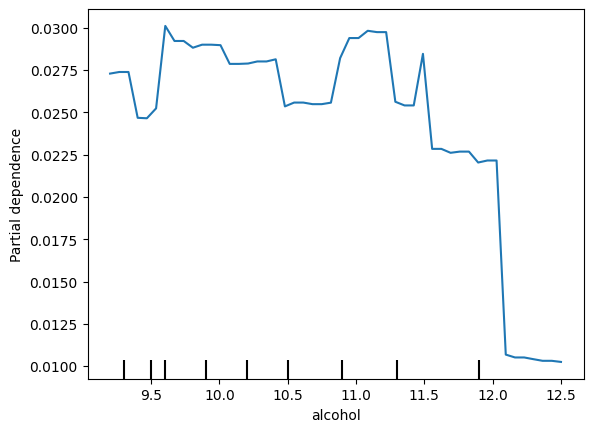

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# 1.1. Tải dữ liệu Wine Quality
from sklearn.datasets import fetch_openml
wine = fetch_openml(name='wine-quality-red', version=1, as_frame=True)
X = wine.data
y = wine.target.astype(int)  # Biến mục tiêu là chất lượng rượu

# 1.2. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1.3. Huấn luyện mô hình LightGBM
model = lgb.LGBMClassifier(random_state=42, verbosity = -1)
model.fit(X_train, y_train)

# 2.1. Chọn đặc trưng cần phân tích (ví dụ: 'alcohol')
feature_name = 'alcohol'

# 2.2. Sử dụng sklearn để tính Partial Dependence
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    [feature_name],
    target=model.classes_[1],
    grid_resolution=50
)
plt.show()

### Accumulated Local Effects (ALE) là gì?

**Accumulated Local Effects (ALE)** là một phương pháp giải thích mô hình machine learning được sử dụng để hiểu mối quan hệ giữa một hoặc nhiều đặc trưng đầu vào với đầu ra dự đoán. ALE được thiết kế để giải quyết những hạn chế của Partial Dependence Plots (PDP), đặc biệt khi các đặc trưng có tương quan mạnh với nhau.

### So sánh ALE với PDP
- **PDP**: Giả định rằng các đặc trưng không phụ thuộc nhau. Nếu có mối tương quan giữa các đặc trưng, PDP có thể đưa ra kết quả sai lệch.
- **ALE**: Không yêu cầu giả định về sự độc lập giữa các đặc trưng, tính toán hiệu ứng địa phương thay vì trung bình toàn cục.

---

### Cách tính toán ALE

1. **Chia nhỏ giá trị của đặc trưng**:
   - Chia phạm vi của đặc trưng thành nhiều khoảng (bins).

2. **Tính hiệu ứng cục bộ (local effect)**:
   - Tính hiệu ứng địa phương của mô hình bằng cách so sánh đầu ra dự đoán khi tăng giá trị của đặc trưng từ bin hiện tại lên bin tiếp theo.

3. **Tích lũy các hiệu ứng địa phương**:
   - Tổng hợp các hiệu ứng địa phương để tạo thành giá trị tích lũy (accumulated).

4. **Chuẩn hóa (center)**:
   - Chuẩn hóa kết quả để đảm bảo giá trị ALE trung bình là 0, giúp dễ dàng so sánh.

---

### Ưu điểm của ALE
1. **Xử lý tương quan giữa các đặc trưng**: ALE chính xác hơn PDP khi các đặc trưng có tương quan cao.
2. **Độ phức tạp thấp hơn SHAP**: Tính toán nhanh và ít tốn tài nguyên hơn so với SHAP.
3. **Dễ hiểu**: Kết quả ALE thường dễ trực quan hóa và giải thích.

---

### Nhược điểm
- Không cung cấp thông tin chi tiết về đóng góp của từng mẫu (như SHAP).
- Phụ thuộc vào cách chia khoảng (binning), có thể ảnh hưởng đến độ chính xác nếu số bin không phù hợp. 

Phương pháp ALE là một lựa chọn tuyệt vời để hiểu mô hình trong trường hợp dữ liệu có tương quan cao hoặc khi muốn một giải pháp giải thích đơn giản và hiệu quả.

## Python snippets use dalex

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from dalex import Explainer
import matplotlib.pyplot as plt

# Create Explainer with DALEX
explainer = Explainer(model, X_train, y_train, label="LightGBM - Wine Quality")

# Generate Partial Dependence Profile (PDP) for a selected feature (e.g., alcohol)
pdp = explainer.model_profile(variables="alcohol", type='partial')

# Generate Accumulated Local Profile (ALE) for the same feature
ale = explainer.model_profile(variables="alcohol", type='accumulated')


Preparation of a new explainer is initiated

  -> data              : 1279 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1279 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : LightGBM - Wine Quality
  -> predict function  : <function yhat_proba_default at 0x000001984DBC6E60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 9.3e-09, mean = 0.0336, max = 0.998
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 3.0, mean = 5.59, max = 8.0
  -> model_info        : package lightgbm

A new explainer has been created!


Calculating accumulated dependency: 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]


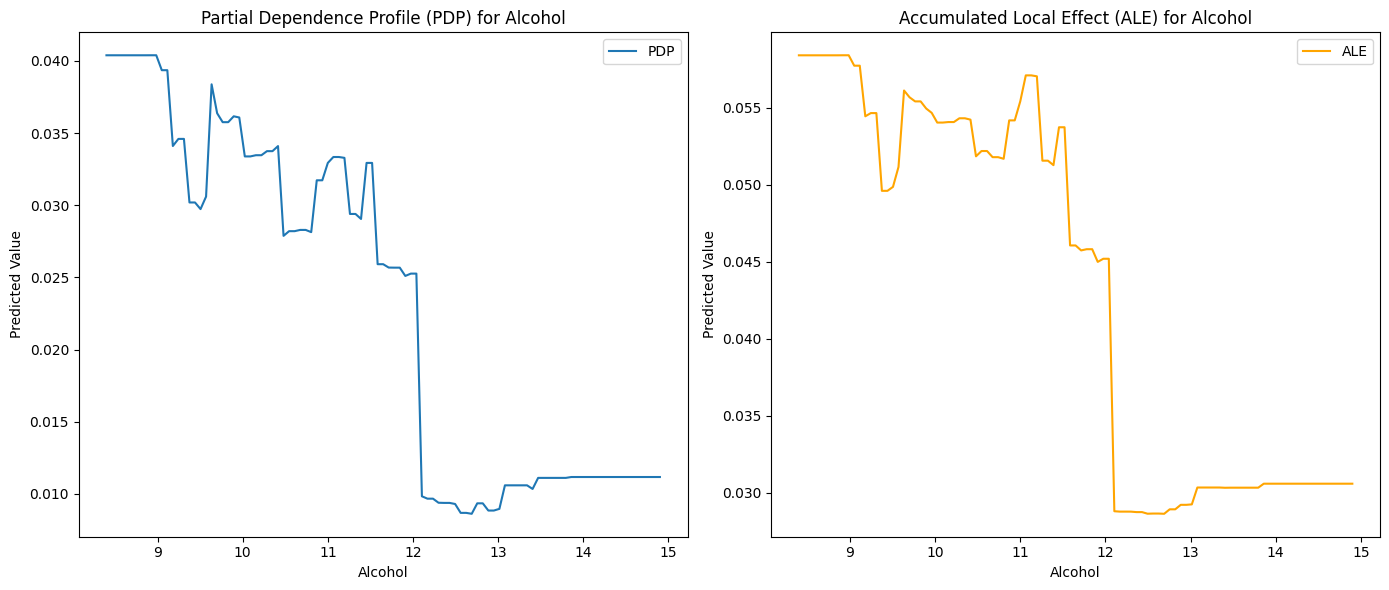

In [3]:
# pdp.plot()
# ale.plot()
# Plot PDP and ALE in subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot PDP
axes[0].plot(pdp.result["_x_"], pdp.result["_yhat_"], label="PDP")
axes[0].set_title("Partial Dependence Profile (PDP) for Alcohol")
axes[0].set_xlabel("Alcohol")
axes[0].set_ylabel("Predicted Value")
axes[0].legend()

# Plot ALE
axes[1].plot(ale.result["_x_"], ale.result["_yhat_"], label="ALE", color="orange")
axes[1].set_title("Accumulated Local Effect (ALE) for Alcohol")
axes[1].set_xlabel("Alcohol")
axes[1].set_ylabel("Predicted Value")
axes[1].legend()

plt.tight_layout()
plt.show()

## Custom lightGBM shap

In [13]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import os

class ShapExplain:
    def __init__(self, model):
        if hasattr(model, 'classes_') and hasattr(model, 'feature_name_'):
            self.model = model
            self.raw_scores = None
            self.proba_scores = None
            self.labels = None
            self.shap_values = None
            self.shap_contributions = None

            # Initialize class attributes from the model
            self.num_classes = len(model.classes_)
            self.num_features = len(model.feature_name_)
            self.feature_names = model.feature_name_ + ["Bias"]
        else:
            raise ValueError("The provided model does not have the required attributes 'classes_' or 'feature_name_'.")

    def predict_raw_scores(self, X):
        if hasattr(self.model, 'predict'):
            self.raw_scores = self.model.predict(X, raw_score=True)
            return self.raw_scores
        else:
            raise AttributeError("The model does not support raw score predictions.")

    def predict_proba(self, X):
        if hasattr(self.model, 'predict_proba'):
            self.proba_scores = self.model.predict_proba(X)
            return self.proba_scores
        else:
            raise AttributeError("The model does not support probability predictions.")

    def predict_labels(self, X):
        self.predict_proba(X)  # Ensure probabilities are always calculated
        self.labels = [np.argmax(score) for score in self.proba_scores]
        return self.labels

    def calculate_shap_values(self, X):
        if hasattr(self.model, 'predict'):
            self.shap_values = self.model.predict(X, pred_contrib=True)
            return self.shap_values
        else:
            raise AttributeError("The model does not support SHAP value predictions.")

    def split_shap_values(self):
        if self.shap_values is None:
            raise ValueError("SHAP values have not been calculated. Call calculate_shap_values first.")
        
        shap_contributions = {}
        for class_idx in range(self.num_classes):
            start_idx = class_idx * (self.num_features + 1)
            end_idx = start_idx + (self.num_features + 1)
            shap_contributions[f"Class_{class_idx}"] = pd.DataFrame(
                self.shap_values[:, start_idx:end_idx], columns=self.feature_names
            )
        self.shap_contributions = shap_contributions
        return self.shap_contributions

    def plot_shap_summary(self, plot_type='bar', output_dir=None, title_prefix=None):        

        # Ensure output directory exists if specified
        if output_dir and not os.path.exists(output_dir):
            os.makedirs(output_dir)

        for class_name, shap_values_df in self.shap_contributions.items():
            shap_values = shap_values_df.iloc[:, :-1].values
            feature_names = shap_values_df.columns[:-1]  # Exclude 'Bias' from feature names

            plt.figure()
            shap.summary_plot(shap_values, feature_names=feature_names, plot_type=plot_type, show=False)

            title = f'SHAP Summary Plot for {class_name}'
            if title_prefix:
                title = f'{title_prefix} {title}'
            plt.title(title)

            if output_dir:
                filename = f'{title_prefix}_{class_name}_shap_summary.png' if title_prefix else f'{class_name}_shap_summary.png'
                plt.savefig(os.path.join(output_dir, filename), bbox_inches='tight')
                plt.close()
            else:
                plt.show()


In [15]:
import lightgbm as lgb
import pandas as pd

# Train an LGBMClassifier
model = lgb.LGBMClassifier(verbosity = -1)
model.fit(X_train, y_train, categorical_feature='auto')

# Instantiate ShapExplain with the trained model
shap_explain = ShapExplain(model)

# Make predictions and calculate SHAP values
raw_scores = shap_explain.predict_raw_scores(X_test)
proba_scores = shap_explain.predict_proba(X_test)
labels = shap_explain.predict_labels(X_test)
shap_values = shap_explain.calculate_shap_values(X_test)
shap_contributions = shap_explain.split_shap_values()

# Optionally, plot and save SHAP summary
shap_explain.plot_shap_summary(plot_type='violin', output_dir='shap_plots', title_prefix='Wine Dataset')

# Save results to Excel
with pd.ExcelWriter('shap_explain_output.xlsx', engine='openpyxl') as writer:
    # Convert raw_scores and labels to DataFrames and write to Excel
    pd.DataFrame(raw_scores).to_excel(writer, sheet_name='Raw Scores')
    pd.DataFrame(proba_scores, columns=[f"Class_{i}" for i in range(shap_explain.num_classes)]).to_excel(writer, sheet_name='Probabilities')
    pd.DataFrame(labels, columns=['Predicted Labels']).to_excel(writer, sheet_name='Labels')

    # Write each class's SHAP contributions to a separate sheet
    for class_name, df in shap_explain.shap_contributions.items():
        df.to_excel(writer, sheet_name=f'SHAP Values {class_name}')


## References

- https://ema.drwhy.ai/partialDependenceProfiles.html
- https://docs.seldon.io/projects/alibi/en/latest/methods/PartialDependence.html
- https://www.blog.trainindata.com/partial-dependence-plots-with-python
- https://www.analyticsvidhya.com/blog/2020/10/accumulated-local-effects-ale-feature-effects-global-interpretability/
